In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('Datasets/Cleaned_prepared_data.csv')
data

,Unnamed: 0,timestamp,icao24,latitude,longitude,ground_speed,track,vertical_rate,baro_altitude,latitude_in_10min,longitude_in_10min,baro_altitude_in_10min,Climbing,Descending,Cruise
0,10060824,2023-05-23 09:00:02,342582,41.280988,2.399389,268.463918,84.013336,1088.0,10025.0,42.024148,2.001172,29175.0,True,False,False
1,10060944,2023-05-23 09:02:02,342582,41.342204,2.601513,330.287468,48.928307,3136.0,14625.0,42.228513,1.819898,31900.0,True,False,False
2,10061064,2023-05-23 09:04:02,342582,41.502949,2.601460,372.413427,322.637777,896.0,19225.0,42.470910,1.768352,34800.0,True,False,False
3,10061184,2023-05-23 09:06:02,342582,41.672353,2.411818,415.895060,318.606717,1472.0,22675.0,42.707428,1.718674,36000.0,True,False,False
4,10061304,2023-05-23 09:08:02,342582,41.843216,2.212996,411.095741,318.945186,1728.0,27100.0,42.946115,1.693072,36000.0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109831,20942036,2023-08-27 12:15:59,ad5b90,53.724976,-9.134426,429.283917,277.091907,64.0,36000.0,53.857215,-11.247011,40000.0,True,False,False
109832,20942194,2023-08-27 12:18:37,ad5b90,53.761690,-9.662314,428.923865,276.694229,-64.0,36000.0,53.878647,-11.658927,40000.0,False,True,False
109833,20942315,2023-08-27 12:20:38,ad5b90,53.787048,-10.055158,408.485877,276.324702,64.0,36000.0,53.898926,-12.067674,40000.0,True,False,False
109834,20942435,2023-08-27 12:22:38,ad5b90,53.811454,-10.442020,422.403470,276.115504,1024.0,37675.0,53.917694,-12.492711,40000.0,True,False,False


In [4]:
# Selecting the features and targets
features = data[['latitude', 'longitude', 'baro_altitude']]
targets = data[['latitude_in_10min', 'longitude_in_10min', 'baro_altitude_in_10min']]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

# Creating a Linear Regression model
linear_model = LinearRegression()

# Training the model
linear_model.fit(X_train, y_train)

# The model is now trained and can be used for predictions
"Model trained successfully"

'Model trained successfully'

In [5]:
# Predictions on the training and testing sets
train_predictions = linear_model.predict(X_train)
test_predictions = linear_model.predict(X_test)

# Evaluating the model
mae_train = mean_absolute_error(y_train, train_predictions)
mae_test = mean_absolute_error(y_test, test_predictions)
r2_train = r2_score(y_train, train_predictions)
r2_test = r2_score(y_test, test_predictions)

(mae_train, mae_test, r2_train, r2_test)

(1086.2455298602806,
 1084.1663513818426,
 0.8628930650268422,
 0.8636362673965845)

In [6]:
# Separating the predictions and true values for latitude and longitude
train_lat_true, train_long_true, train_alt_true = y_train['latitude_in_10min'], y_train['longitude_in_10min'], y_train['baro_altitude_in_10min']
test_lat_true, test_long_true, test_alt_true = y_test['latitude_in_10min'], y_test['longitude_in_10min'], y_test['baro_altitude_in_10min']
train_lat_pred, train_long_pred, train_alt_pred = train_predictions[:, 0], train_predictions[:, 1], train_predictions[:, 2]
test_lat_pred, test_long_pred, test_alt_pred = test_predictions[:, 0], test_predictions[:, 1], test_predictions[:, 2]

# Calculating metrics for latitude
mae_train_lat = mean_absolute_error(train_lat_true, train_lat_pred)
mae_test_lat = mean_absolute_error(test_lat_true, test_lat_pred)
r2_train_lat = r2_score(train_lat_true, train_lat_pred)
r2_test_lat = r2_score(test_lat_true, test_lat_pred)

# Calculating metrics for longitude
mae_train_long = mean_absolute_error(train_long_true, train_long_pred)
mae_test_long = mean_absolute_error(test_long_true, test_long_pred)
r2_train_long = r2_score(train_long_true, train_long_pred)
r2_test_long = r2_score(test_long_true, test_long_pred)

# Calculating metrics for Altitude
mae_train_alt = mean_absolute_error(train_alt_true, train_alt_pred)
mae_test_alt = mean_absolute_error(test_alt_true, test_alt_pred)
r2_train_alt = r2_score(train_alt_true, train_alt_pred)
r2_test_alt = r2_score(test_alt_true, test_alt_pred)

print("Latitude metrics:", mae_train_lat, mae_test_lat, r2_train_lat, r2_test_lat)
print("Longitude metrics:", mae_train_long, mae_test_long, r2_train_long, r2_test_long)
print("Altitude metrics:", mae_train_alt, mae_test_alt, r2_train_alt, r2_test_alt)

Latitude metrics: 0.136108846876129 0.13430973177817074 0.9881322858675732 0.9884432508327954
Longitude metrics: 0.17624104079539604 0.1743935567627768 0.9709089510340982 0.9704050176499958
Altitude metrics: 3258.424239693179 3252.1903508569785 0.6296379581788532 0.6320605337069596


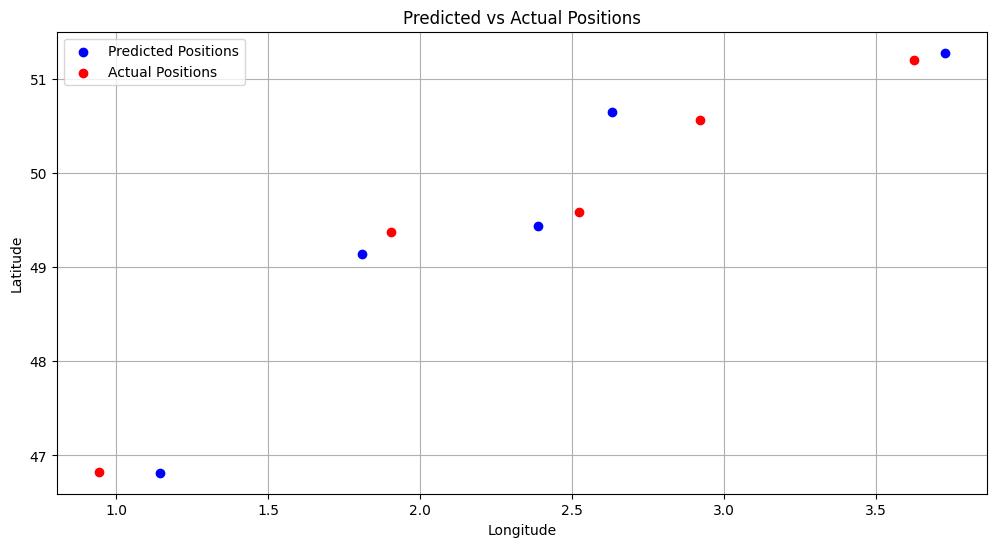

In [7]:
# Selecting a few random samples from the test dataset for prediction
np.random.seed(1)
sample_indices = np.random.choice(X_test.index, size=5, replace=False)
sample_data = X_test.loc[sample_indices]

# Using the model to predict the latitude and longitude in 10 minutes
predicted_positions = linear_model.predict(sample_data)

# Actual positions for comparison
actual_positions = y_test.loc[sample_indices]

# Visualization
plt.figure(figsize=(12, 6))

# Plotting predicted positions
plt.scatter(predicted_positions[:, 1], predicted_positions[:, 0], color='blue', label='Predicted Positions')

# Plotting actual positions
plt.scatter(actual_positions['longitude_in_10min'], actual_positions['latitude_in_10min'], color='red', label='Actual Positions')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Predicted vs Actual Positions')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
# Selecting a few example data points from the test set
example_data = X_test.sample(10, random_state=1)

# Actual values for comparison
actual_values = y_test.loc[example_data.index]

# Making predictions
predictions = linear_model.predict(example_data)

# Creating a DataFrame for comparison
comparison = pd.DataFrame({
    'Actual Latitude': actual_values['latitude_in_10min'],
    'Predicted Latitude': predictions[:, 0],
    'Latitude Error': np.abs(actual_values['latitude_in_10min'] - predictions[:, 0]),
    'Actual Longitude': actual_values['longitude_in_10min'],
    'Predicted Longitude': predictions[:, 1],
    'Longitude Error': np.abs(actual_values['longitude_in_10min'] - predictions[:, 1]),
    'Actual Altitude': actual_values['baro_altitude_in_10min'],
    'Predicted Altitude': predictions[:, 2],
    'Altitude Error': np.abs(actual_values['baro_altitude_in_10min'] - predictions[:, 2])
})

comparison.reset_index(drop=True, inplace=True)
comparison

,Actual Latitude,Predicted Latitude,Latitude Error,Actual Longitude,Predicted Longitude,Longitude Error,Actual Altitude,Predicted Altitude,Altitude Error
0,46.826337,46.817077,0.009261,0.943726,1.143012,0.199286,38025.0,37470.962058,554.037942
1,49.373474,49.136617,0.236857,1.904579,1.809358,0.095220,35975.0,32071.985128,3903.014872
2,51.201141,51.274871,0.073730,3.623707,3.725362,0.101656,20475.0,24230.967569,3755.967569
3,49.581299,49.439265,0.142034,2.523960,2.385896,0.138065,40000.0,33889.787908,6110.212092
4,50.556708,50.645257,0.088549,2.919097,2.631289,0.287808,27900.0,29193.942063,1293.942063
5,42.779831,42.837734,0.057904,1.520776,1.369319,0.151457,34250.0,32054.196955,2195.803045
6,48.753740,48.534930,0.218810,2.181148,2.286458,0.105310,35950.0,32745.074353,3204.925647
7,49.020158,48.944434,0.075724,1.465880,1.455353,0.010527,40000.0,35234.459434,4765.540566
8,48.893188,48.946477,0.053289,1.881831,1.997549,0.115718,38000.0,33584.636530,4415.363470
9,46.097672,46.141114,0.043443,0.651744,0.876648,0.224904,36000.0,37401.164322,1401.164322
